<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [3]:
# Boston data is from SKlearn so it is clean

### Calculate a null baseline score by comparing the observed target values to each average target value

In [4]:
# import mse
from sklearn.metrics import mean_squared_error
# get an array of average values of boston.target the same length as boston.target
target_mean_list = [boston.target.mean() for x in boston.target]
# passing the boston.target values and target_mean_list values into the mean squared error function and take 
# the square root
np.sqrt(mean_squared_error(boston.target, target_mean_list))

9.188011545278203

### 2. Select 3-4 variables with your dataset to perform a 70/30 test train split on

- Use sklearn.
- Score and plot your predictions.

In [5]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

predictors = ['CRIM', u'RM', 'B', 'LSTAT']

X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.5, random_state=8)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.663646320350316

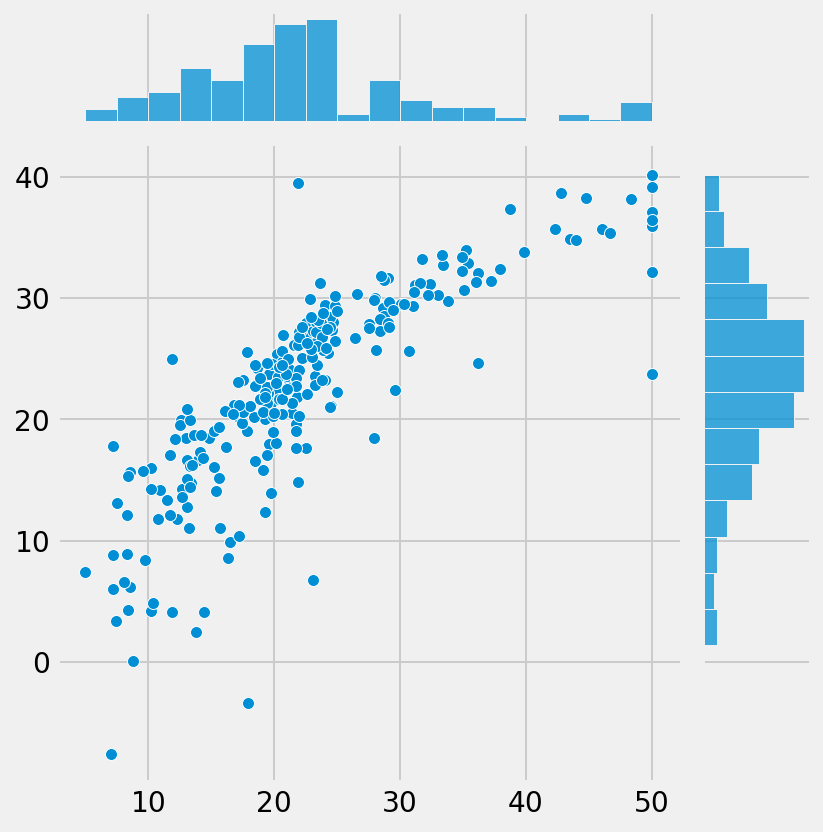

In [9]:
yhat = lr.predict(X_test)
sns.jointplot(x=y_test, y=yhat);

### 4. Try K-Folds cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [8]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# iterate through folds 5-10
for folds in range(5,11):
    print('------------------------------------\n')
    print('K: {}'.format(folds))
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X[predictors], y, cv=folds)
    print("Cross-validated scores: {}".format(scores))
    print("Mean CV R2: {}".format(np.mean(scores)))
    print('Std CV R2: {}'.format(np.std(scores)))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X[predictors], y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print("Cross-Predicted R2: {}".format(r2))


------------------------------------

K: 5
Cross-validated scores: [ 0.64643662  0.70494178  0.44154394  0.08682092 -0.49941486]
Mean CV R2: 0.2760656794677724
Std CV R2: 0.443999110102396
Cross-Predicted R2: 0.5179358218718011
------------------------------------

K: 6
Cross-validated scores: [ 0.60629456  0.70763272  0.52029859  0.61899961 -0.33584065 -0.21629338]
Mean CV R2: 0.3168485760705544
Std CV R2: 0.42415051724797964
Cross-Predicted R2: 0.47593428533731863
------------------------------------

K: 7
Cross-validated scores: [ 0.65523009  0.59556838  0.5358105   0.49507761  0.24551663 -0.69093403
  0.11913605]
Mean CV R2: 0.2793436035323386
Std CV R2: 0.4345530731153761
Cross-Predicted R2: 0.4237786401686785
------------------------------------

K: 8
Cross-validated scores: [ 0.67248867  0.61782209  0.68506083  0.61035927  0.58782058 -0.28495311
 -1.03064528  0.03693312]
Mean CV R2: 0.23686076994423616
Std CV R2: 0.5828049393173513
Cross-Predicted R2: 0.5821905733958437
--------